<h1> Desistimiento de clientes, empresa de telecomunicaciones.</h1>
<p> El modelo busca clasificar si los clientes de una empresa de telecomunicaciones pueden llegar a darse de baja de los servicios de la compañia, esta clasificación se ejecutará basados en diferentes features dispuestos por el área de servicio al cliente. 
<p> La regresión logística es un algoritmo de aprendizaje supervisado utilizado principalmente para resolver problemas de clasificación binaria, es decir, cuando el objetivo es predecir una variable de salida categórica con solo dos posibles clases (por ejemplo, sí/no, verdadero/falso, positivo/negativo).
<p> El presente problema se aborda y busca resolver, aplicando la regresión logistica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Cargue de archivos
ruta = 'C:/Users/chech/PC Febrero 2023/CoderHouse/Data Scients/proyectoCoder/insights/data/'
df = pd.read_csv(ruta + 'RetirosClientes_Teleco.csv')

In [3]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<h4> Variable TARGET: CHURN
<p> Churn = Quiere decir si un cliente se da de baja de su plan.
<P> <p>  Cambiar los valores de la columna "TotalCharges" a numerico.

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

<P> Identificación de datos nulos.

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Eliminar valores nulos "NA" (11)
df.dropna(inplace=True)

In [8]:
# Eliminar variable que no genera valor en el modelo. 
df.drop('customerID', axis=1, inplace=True)

<h4> Convertir a numerico la variable target "Churn"

In [9]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)

In [10]:
df_processing = df.copy()

In [11]:
df_processing.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


<p> Con el fin de buscar un mejor performance en el modelo, se procede a convertir las variables categoricas a numericas.

In [13]:
df_processing = pd.get_dummies(df_processing)
df_processing = df_processing.astype(int)
df_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56,1889,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53,108,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42,1840,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70,151,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<h3> Analisis de correlación y escalabilidad de los datos. </h3>
<p> Debido a la cantidad de features, se hace el analisis de correlación solo en base a la variable TARGET

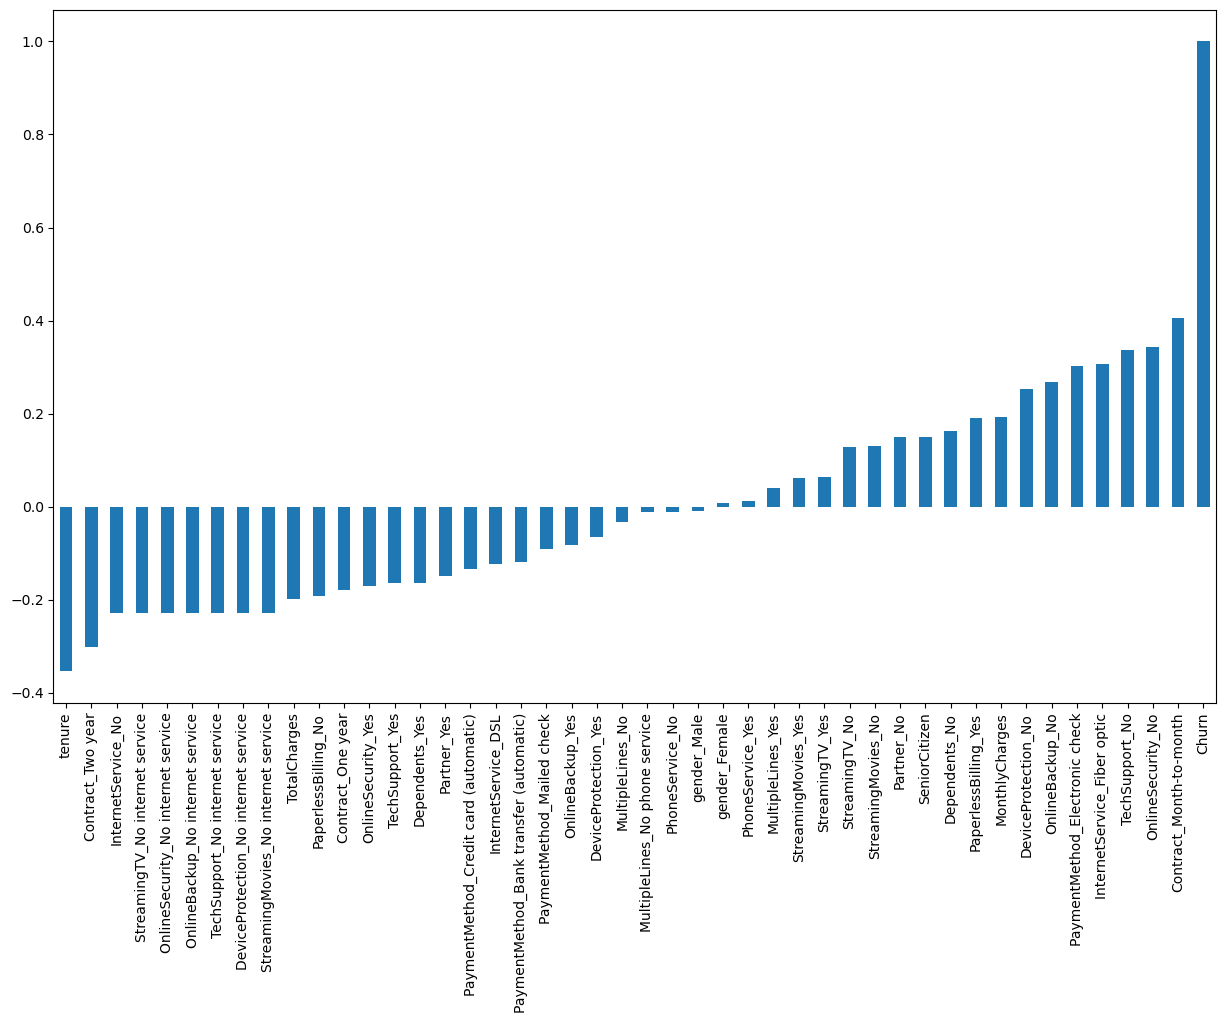

In [14]:
fig = plt.figure(figsize=(15, 9))
df_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

<h4> Escalabilidad de los datos. </h4>

In [15]:
scaler = MinMaxScaler()
df_processing_scaled = scaler.fit_transform(df_processing)

df_processing_scaled = pd.DataFrame(df_processing_scaled)

df_processing_scaled.head(4)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.000000,0.11,0.001269,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.38,0.215901,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.35,0.010385,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.24,0.210247,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [16]:
df_processing_scaled.columns = df_processing.columns

df_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.11,0.001269,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.38,0.215901,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.35,0.010385,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.24,0.210247,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.52,0.015347,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<h2> Análisis exploratorio de datos - EDA </h2>

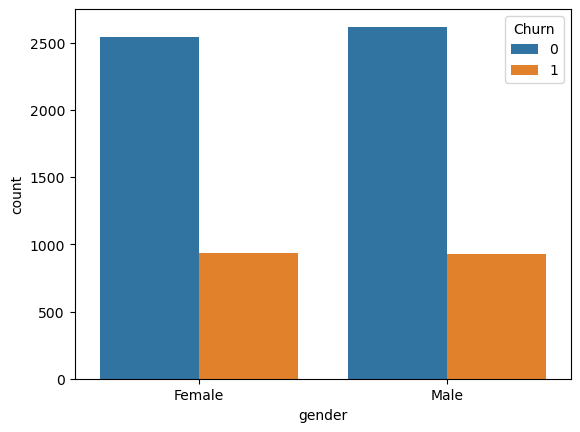

In [18]:
sns.countplot(data=df, x='gender', hue='Churn')
plt.show()

In [19]:
# Función para graficar
 
def plot_categorical(column):
    fig = plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=column, hue='Churn')
    plt.show()

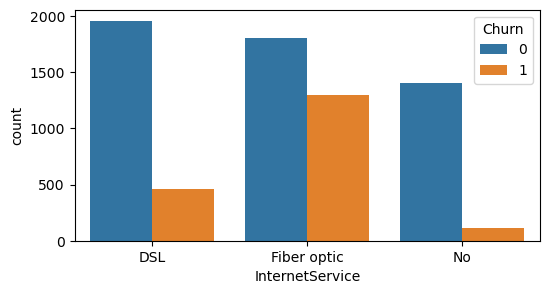

In [24]:
plot_categorical('InternetService')

<h3> Grafica de variabless categoricas </h3>

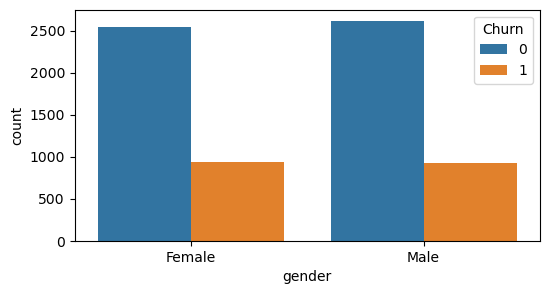

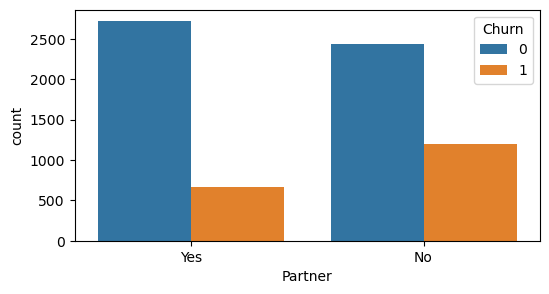

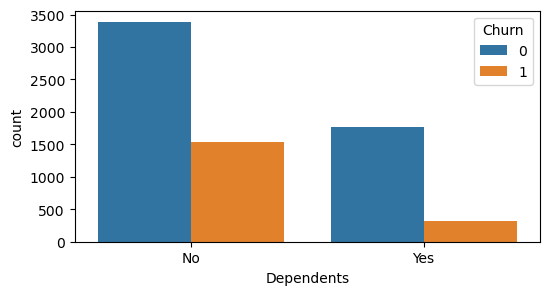

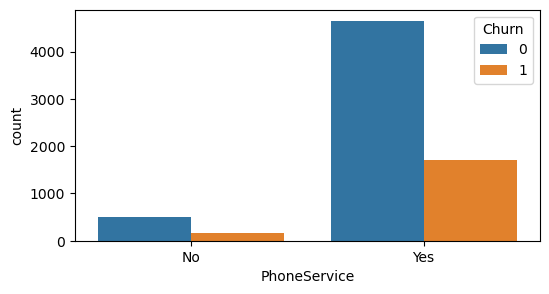

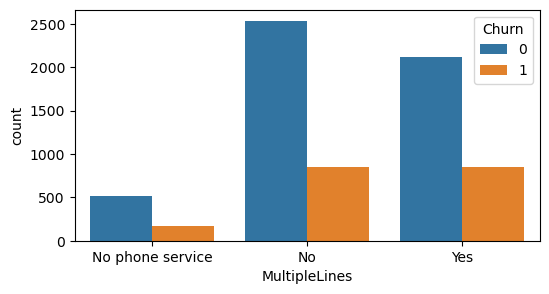

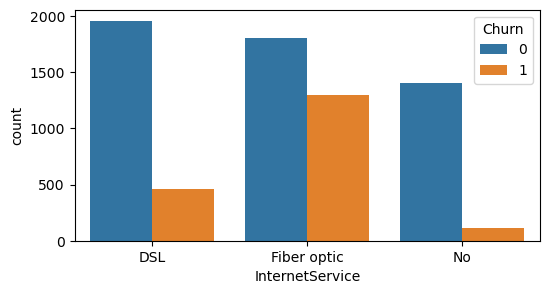

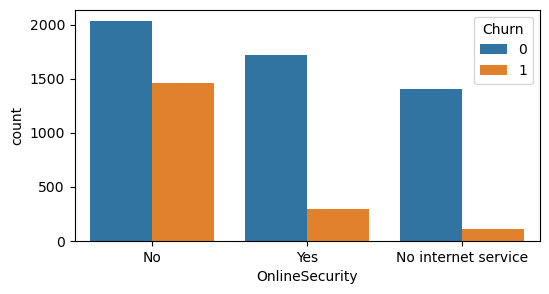

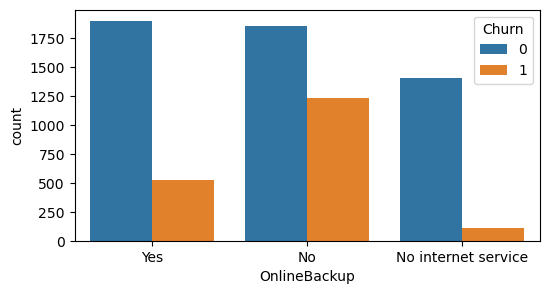

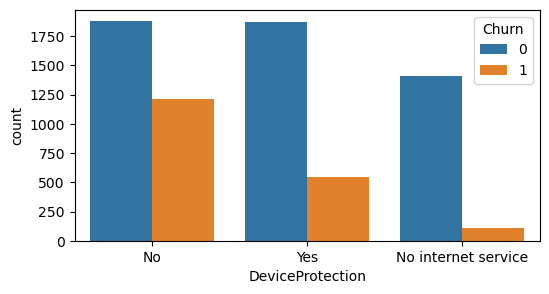

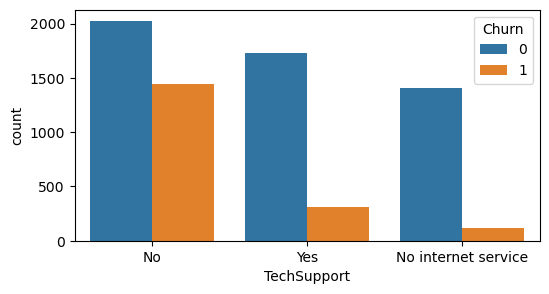

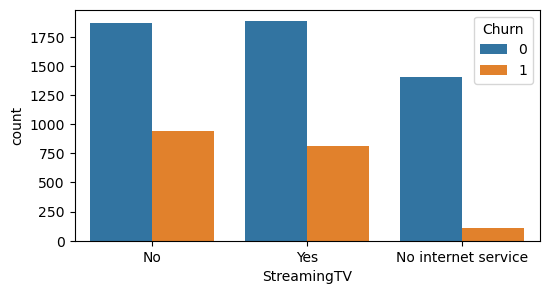

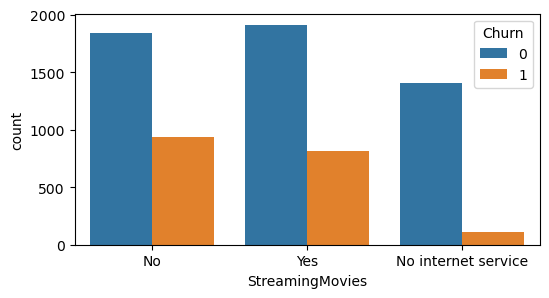

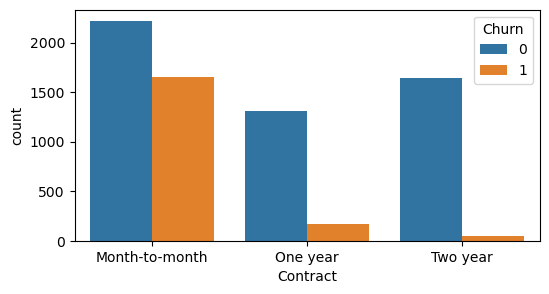

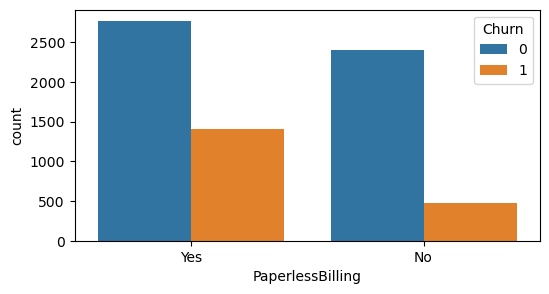

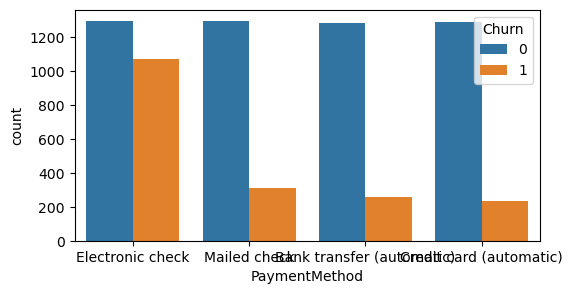

In [26]:
column_cat = df.select_dtypes(include='object').columns

for _ in column_cat:
    plot_categorical(_)

<h4> Grafica variables numericas </h4> 

<Figure size 1000x1000 with 0 Axes>

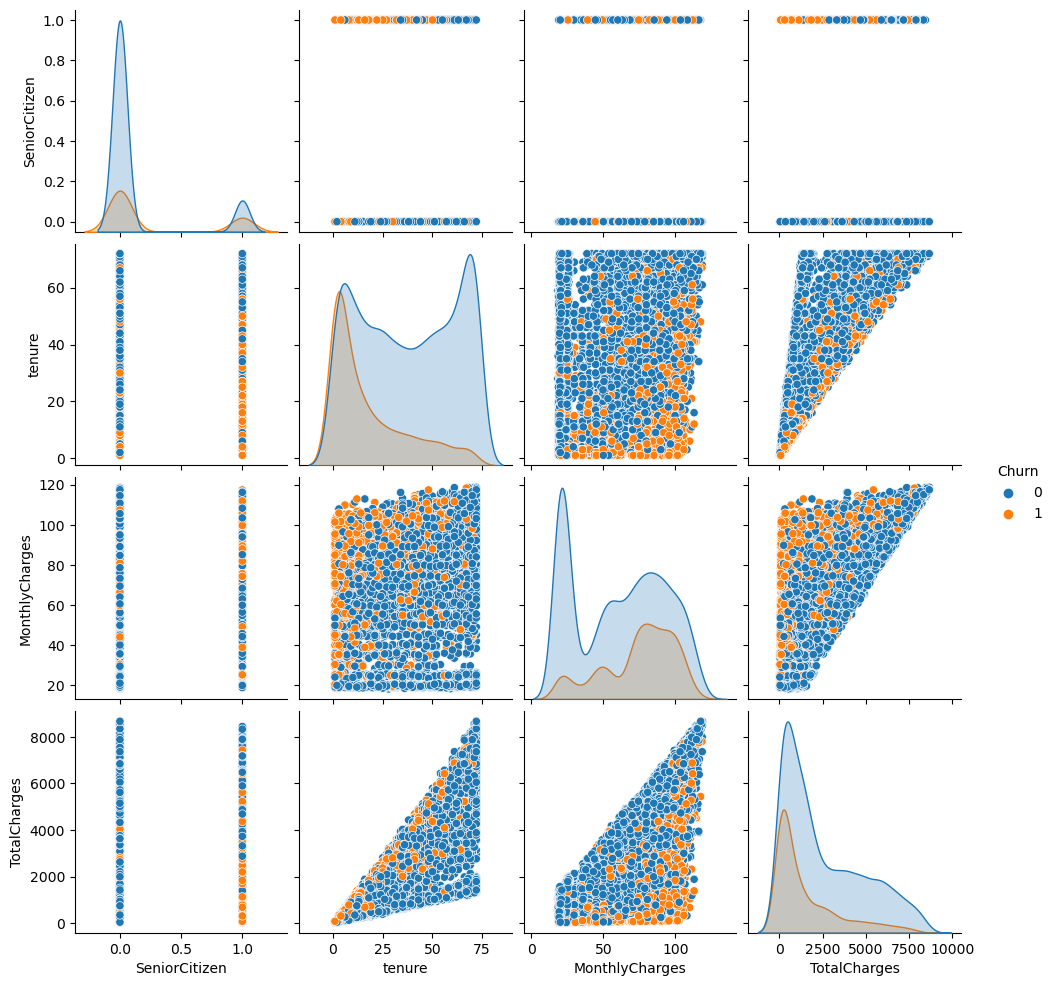

In [27]:
fig = plt.figure(figsize=(10, 10))
sns.pairplot(data=df, hue='Churn')
plt.show()

<h1> Entenamiento del modelo. </h1> 

In [28]:
# Definición de variables FEATURES y TARGET.
X = df_processing_scaled.drop('Churn', axis=1)
y = df_processing_scaled['Churn'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
print('El tamaño del set de ENTRENAMIENTO es de', X_train.shape)
print('El tamaño del set de PRUEBA es de', X_train.shape)

El tamaño del set de ENTRENAMIENTO es de (4922, 45)
El tamaño del set de PRUEBA es de (4922, 45)


<h3> Entrenamiento del modelo </h3>

In [33]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h3> Medición del accuracy </h3>

In [37]:
prediction_test = model.predict(X_test)
print('El accuracy del modelo es de: ' ,metrics.accuracy_score(y_test, prediction_test).round(3))

El accuracy del modelo es de:  0.796


In [38]:
model.predict_proba(X_test)
model.coef_
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


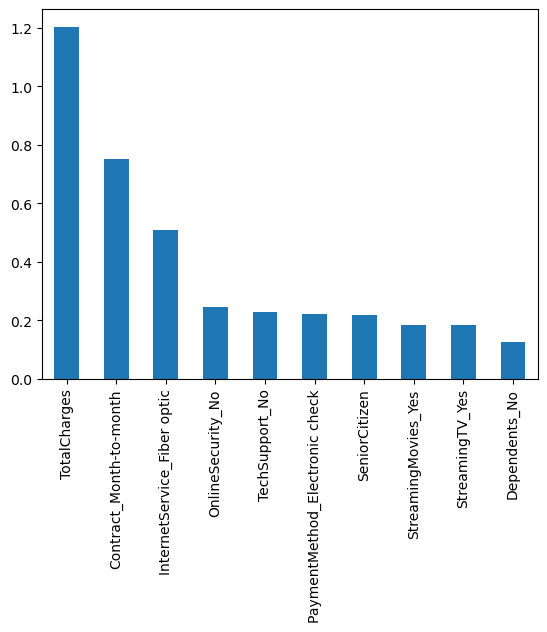

In [39]:
weights = pd.Series(model.coef_[0],
                   index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

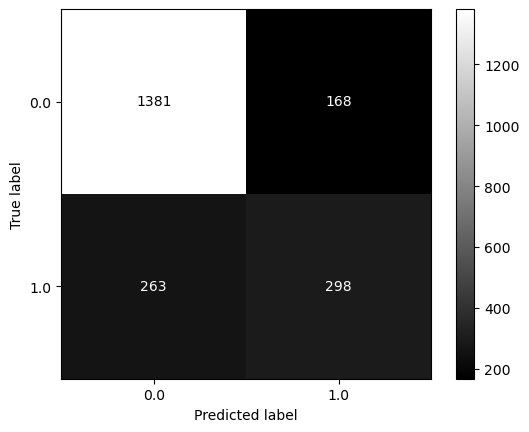

In [40]:
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()